In [1]:
#Import Libraries (quandl already installed)

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
#Configure API key

quandl.ApiConfig.api_key = 'ixTq5-VpjyNjPMhRFmtd'

In [3]:
# Importing the Natural Gas Delivered ; Commercial ; Middle Atlantic, Data

data = quandl.get('EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_NG_NA_MATL_Y13DLRPMCF_A')

In [4]:
data.head()

,Value
Date,
2014-12-31,9.311192
2015-12-31,8.075124
2016-12-31,7.146943
2017-12-31,7.410106
2018-12-31,7.795232


In [5]:
data.shape

(27, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

### Subsetting Data

In [7]:
data_sub= data.reset_index()

In [8]:
data_sub.head()

,Date,Value
0,2014-12-31,9.311192
1,2015-12-31,8.075124
2,2016-12-31,7.146943
3,2017-12-31,7.410106
4,2018-12-31,7.795232


In [10]:
data_sub = data_sub.loc[(data_sub['Date'] >= '1980-01-01') & (data_sub['Date'] < '2022-06-01')]

In [11]:
data_sub.shape

(8, 2)

In [12]:
data_sub.head()

,Date,Value
0,2014-12-31,9.311192
1,2015-12-31,8.075124
2,2016-12-31,7.146943
3,2017-12-31,7.410106
4,2018-12-31,7.795232


In [13]:
from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')

In [14]:
data_sub.drop(['Date'], axis=1, inplace=True)

In [16]:
data_sub.columns

Index(['Value'], dtype='object')

In [17]:
data_sub.head()

,Value
datetime,
2014-12-31,9.311192
2015-12-31,8.075124
2016-12-31,7.146943
2017-12-31,7.410106
2018-12-31,7.795232


### Time Series Analysis

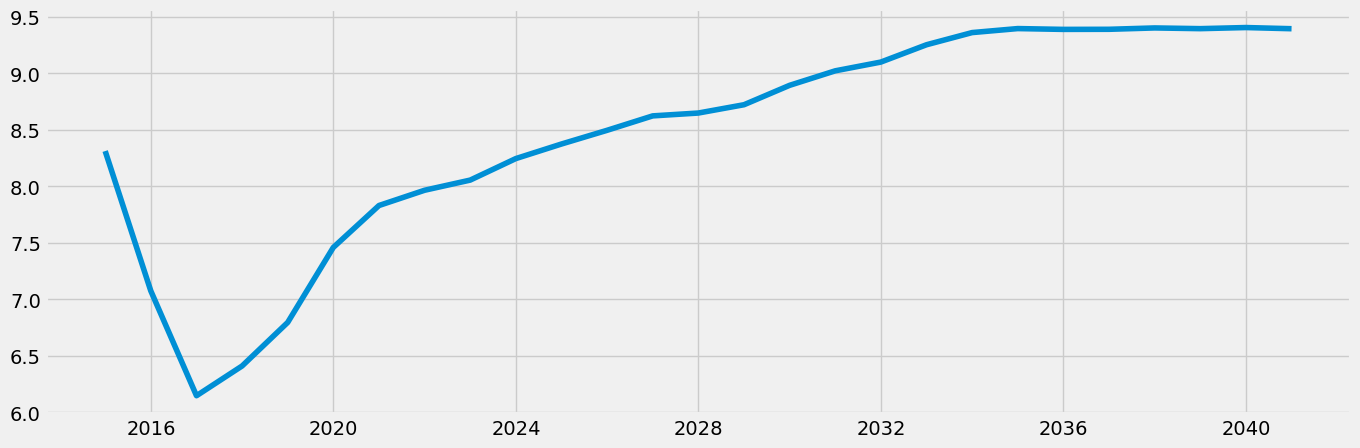

In [18]:
# Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data-1)

In [19]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [20]:
#Define the size for the charts
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

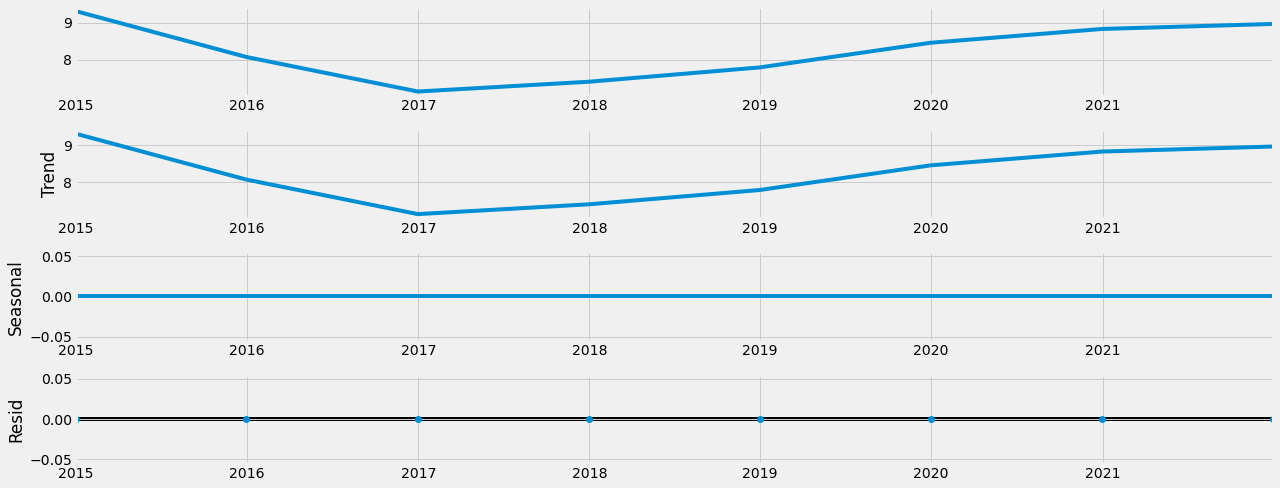

In [21]:
# Plot the separate components
decomposition.plot()
plt.show()

### Testing for stationarity and autocorrelation

In [22]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

In [23]:
#Define the function to print the correct output from the array of numbers. 
#Run the Dickey-fuller stationarity test to prove that the data isn't stationary and needs to be addressed

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [24]:
# Apply the test using the function on the time series

dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -7.110546e+00
p-value                        3.949506e-10
Number of Lags Used            2.000000e+00
Number of Observations Used    5.000000e+00
Critical Value (1%)           -6.045114e+00
Critical Value (5%)           -3.929280e+00
Critical Value (10%)          -2.986810e+00
dtype: float64


#The test statistic -7.11 is smaller than the CV 5% of -3.92 so I can reject the null hypothesis and it is stationary.

In [25]:
#Create a plot of autocorrelations
#Import the autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

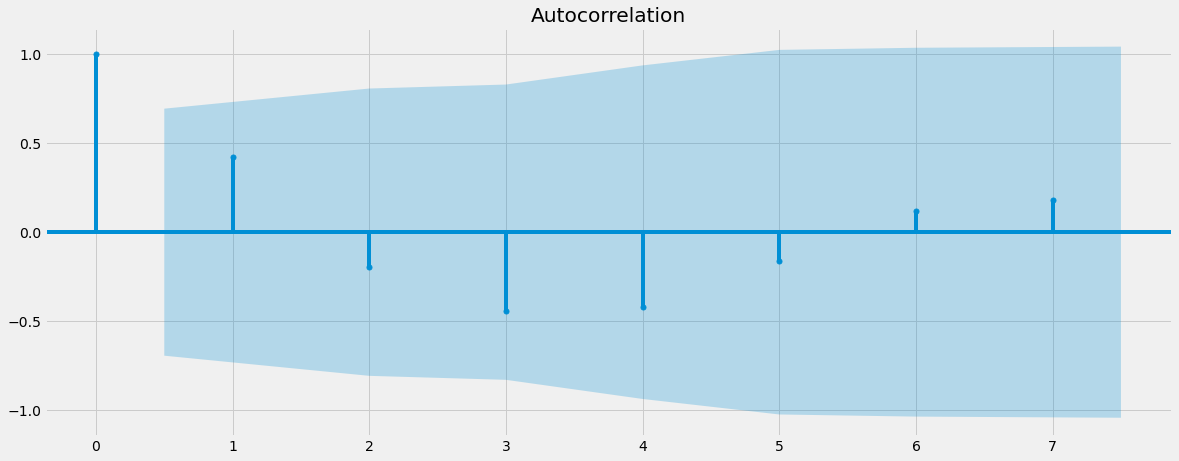

In [26]:
#Plot the autocorrelation

plot_acf(data_sub)
plt.show()

#Most of the vertical lines/lags are in the confidence interval so the data is stationary